###  Background - 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition

### Problem Statement 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

For Post paid customers ,  its fairly straight forward but predicting churn for pre paid customers may be an exhaustive task

Definition of Churn -1. Usage based (No Incoming or outgoing since last 2 months )
High Value - 20% customers potentially generating revenue (Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months)



In [2]:
# Importing basic libraries (using Logistic regression as we r trying to predict potential churn)

import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy.stats import norm 

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

In [29]:
#Read csv file from local 
data = pd.read_csv('telecom_churn_data.csv')
data.head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
1      7001865778        109             0.0             0.0             0.0   
2      7001625959        109             0.0             0.0             0.0   
3      7001204172        109             0.0             0.0             0.0   
4      7000142493        109             0.0             0.0             0.0   
5      7000286308        109             0.0             0.0             0.0   
6      7001051193        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
9      7001864400        109             0.0             0.0             0.0   
10     7000471350        109             0.0             0.0             0.0   
11     7002006969        109             0.0             0.0             0.0   
12     7001419799        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
14     7001654241        109             0.0             0.0             0.0   
15     7002070365        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   
18     7001678155        109             0.0             0.0             0.0   
19     7001754084        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
4             6/30/2014            7/31/2014            8/31/2014   
5             6/30/2014            7/31/2014            8/31/2014   
6             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
9             6/30/2014            7/31/2014            8/31/2014   
10            6/30/2014            7/31/2014            8/31/2014   
11            6/30/2014            7/31/2014            8/31/2014   
12            6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
14            6/30/2014            7/31/2014            8/31/2014   
15            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   
18            6/30/2014            7/31/2014            8/31/2014   
19            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
1             9/30/2014    34.047   355.074   268.321   86.285        24.11   
2             9/30/2014   167.690   189.058   210.226  290.714        11.54   
3             9/30/2014   221.338   251.102   508.054  389.500        99.91   
4             9/30/2014   261.636   309.876   238.174  163.426        50.31   
5             9/30/2014    50.258    58.810    83.386  170.826        50.16   
6             9/30/2014   429.023   190.704   255.114  114.751        71.03   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
9             9/30/2014   119.518   247.435   170.231  160.042        33.89   
10  

In [30]:
# Basic checks understanding the file .Shows there are 226 attributes ans 99999 rows in the csv file  

data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [31]:
data. describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [32]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 100)

In [33]:
# Checking for missing values
msng_values=100 * data.isnull().sum()/ len(data)

In [34]:
msng_values.sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
                              ...    
last_day_rch_amt_6           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_8           0.000000
last_day_rch_amt_9           0.000000
mobile_number                0.000000
Length: 226, dtype: float64

In [35]:
## Impute onnet, offnet, roam_og, loc_og, std_og, isd_og, spl_og, og_others as 0 as total_og_mou is 0 for customer
og_data_columns_to_update = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9']
data[og_data_columns_to_update] = data[og_data_columns_to_update].fillna(0)
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [36]:
## Impute roam_ic, loc_ic, std_ic, spl_ic, isd_ic, ic_others as 0 as total_ic_mou is 0 for customer
ic_data_columns_to_update = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']
data[ic_data_columns_to_update] = data[ic_data_columns_to_update].fillna(0)
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [37]:
## Fill null values for data pack recharge amount and count to 0 
## 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 
## 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
## 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
## 'av_rech_amt_data_8', 'av_rech_amt_data_9'
data_recharge_columns_to_update = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
data[data_recharge_columns_to_update] = data[data_recharge_columns_to_update].fillna(0)
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100         0.00   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [40]:
msng_values=100 * data.isnull().sum()/ len(data)
msng_values.sort_values(ascending=False)

date_of_last_rech_data_6    74.846748
fb_user_6                   74.846748
night_pck_user_6            74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
                              ...    
isd_ic_mou_8                 0.000000
isd_ic_mou_7                 0.000000
isd_ic_mou_6                 0.000000
spl_ic_mou_9                 0.000000
mobile_number                0.000000
Length: 226, dtype: float64

In [41]:
# The total amount of recharge for talktime is missing and has to be caluculated from the average and number of rechanrges

data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_data_rech_amt_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']
data.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29         0.00        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91          0.00          16.23          33.49          31.64   
8        136.48        108.71 

In [23]:
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [42]:
data['total_rech_6'] = data['total_data_rech_amt_6'] + data['total_rech_amt_6']
data['total_rech_7'] = data['total_data_rech_amt_7'] + data['total_rech_amt_7']
data['total_rech_8'] = data['total_data_rech_amt_8'] + data['total_rech_amt_8']
data['total_rech_9'] = data['total_data_rech_amt_9'] + data['total_rech_amt_9']
data.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100         0.00   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29         0.00        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00           0.00           0.00           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91          0.00          16.23          33.49          31.64   
8        136.48        108.71 

In [43]:
## Average recharge amount for June + July
data['total_rech_6_7'] = data['total_rech_6'] + data['total_rech_7']
round(data['total_rech_6_7'].mean(), 2)

970.66

In [44]:
## finding 70th Percentile of average recharge amount for June + July

data['total_rech_6_7'].quantile(0.7)

956.0

In [45]:

## Getting high value customers
data_hig_val=data[(data['total_rech_6_7']>=data['total_rech_6_7'].quantile(0.7))]

In [46]:
data_hig_val.shape

(30001, 235)

Note 
70 Percentile of recharge amount is : 956.0
Shape of high value customer data: (30001, 235)

In [47]:
data_hig_val.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.000100e+04    30001.0         29777.0         29777.0   
mean    7.001206e+09      109.0             0.0             0.0   
std     6.908784e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000609e+09      109.0             0.0             0.0   
50%     7.001203e+09      109.0             0.0             0.0   
75%     7.001804e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         29777.0  30001.000000  30001.000000  30001.000000  30001.000000   
mean              0.0    558.490824    560.782203    508.597957    467.124246   
std               0.0    460.640461    479.776947    501.961981    501.568240   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0    309.865000    309.826000    231.473000    189.607000   
50%               0.0    481.694000    480.943000    427.585000    387.817000   
75%               0.0    699.943000    698.315000    661.491000    626.163000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     260.793024    267.819295    234.112539    211.487618    373.693961   
std      459.644368    479.993989    458.448598    436.278204    482.523558   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.080000     16.030000     10.390000      6.230000     71.610000   
50%       84.580000     82.810000     65.610000     54.310000    222.540000   
75%      290.440000    290.240000    239.960000    209.040000    487.940000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     378.103169    335.077044    303.233503      16.110355      12.642504   
std      498.923555    482.062509    447.924597      76.302156      75.785903   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       69.910000     46.740000     31.660000       0.000000       0.000000   
50%      220.030000    182.790000    155.630000       0.000000       0.000000   
75%      494.010000    438.890000    396.810000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       12.500551      10.536772      26.571547      20.152086   
std        74.125281      66.963177     116.205525      96.100428   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       19.865615      15.788952         84.484753         85.674287   
std       104.719009      88.504692        228.794004        240.525999   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
max      

### Tagging Churn
The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9,
total_og_mou_9,
vol_2g_mb_9,
vol_3g_mb_9

In [48]:


data_hig_val['Churn'] = 0
data_hig_val['Churn'] = data_hig_val.index.isin(data_hig_val[(data_hig_val.total_og_mou_9 != 0) | (data_hig_val.total_ic_mou_9 != 0) | (data_hig_val.vol_2g_mb_9 != 0) | (data_hig_val.vol_3g_mb_9 != 0)].index)
data_hig_val.Churn = data_hig_val.Churn.apply(lambda x: 1 if x==False else 0)

data_hig_val.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100         0.00   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             0.0           0.00           0.00           0.00            0.0   
7             0.0          23.74          12.59          38.06            0.0   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00    

In [49]:
data_hig_val.Churn.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: Churn, dtype: float64

In [50]:
data_hig_val.shape

(30001, 236)

In [52]:
columnslist = ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 'total_rech_6', 'total_rech_7', 'total_rech_8', 'Churn']
data1 = data_hig_val[columnslist]
data1.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

In [25]:
data1.shape

(30001, 179)

In [53]:
data2 = data_hig_val[columnslist]
data2.shape

(30001, 179)

### Data Cleaning & EDA

In [54]:
# Checking for missing values
missing_values = round(data1.isna().sum() / len(data1) * 100, 2).sort_values(ascending=False)
missing_values

date_of_last_rech_data_8    46.83
fb_user_8                   46.83
arpu_3g_8                   46.83
arpu_2g_8                   46.83
night_pck_user_8            46.83
                            ...  
total_rech_num_7             0.00
total_rech_num_6             0.00
ic_others_8                  0.00
ic_others_7                  0.00
mobile_number                0.00
Length: 179, dtype: float64

In [27]:
# Select columns with more than 40% missing values
drop_missing_col = missing_values[missing_values > 40].index.tolist()
drop_missing_col

['date_of_last_rech_data_8',
 'fb_user_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'date_of_last_rech_data_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'fb_user_6',
 'night_pck_user_6',
 'arpu_3g_7',
 'fb_user_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'night_pck_user_7']

In [28]:
data1.drop(drop_missing_col, axis=1, inplace=True)
data1.shape

(30001, 164)

In [29]:
# Checking for missing values
missing_values_1 = round(data1.isna().sum() / len(data1) * 100, 2).sort_values(ascending=False)
missing_values_1

date_of_last_rech_8     1.94
loc_og_t2o_mou          0.75
std_og_t2o_mou          0.75
loc_ic_t2o_mou          0.75
last_date_of_month_8    0.55
                        ... 
total_rech_num_7        0.00
total_rech_num_6        0.00
ic_others_8             0.00
ic_others_7             0.00
mobile_number           0.00
Length: 164, dtype: float64

In [30]:
## Dropping off rows with missing values 

for col in data1.columns:
    data1 = data1[~data1[col].isna()]
    
# Re-check missing values
round(data1.isna().sum() / len(data1) * 100, 2).sort_values(ascending=False)

Churn               0.0
og_others_7         0.0
spl_og_mou_8        0.0
spl_og_mou_7        0.0
spl_og_mou_6        0.0
                   ... 
total_rech_amt_7    0.0
total_rech_amt_6    0.0
total_rech_num_8    0.0
total_rech_num_7    0.0
mobile_number       0.0
Length: 164, dtype: float64

In [31]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
data1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.911000e+04    29110.0         29110.0         29110.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.899573e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000610e+09      109.0             0.0             0.0   
50%     7.001206e+09      109.0             0.0             0.0   
75%     7.001804e+09      109.0             0.0             0.0   
90%     7.002165e+09      109.0             0.0             0.0   
95%     7.002284e+09      109.0             0.0             0.0   
99%     7.002385e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         29110.0  29110.000000  29110.000000  29110.000000  29110.000000   
mean              0.0    558.693920    566.877823    518.507567    263.464513   
std               0.0    452.268736    480.250569    502.585272    459.709822   
min               0.0   -810.661000   -622.509000   -345.129000      0.000000   
25%               0.0    312.830750    317.122250    243.871750     18.310000   
50%               0.0    483.251500    485.723500    436.041000     86.890000   
75%               0.0    699.168250    702.575500    668.343500    295.130000   
90%               0.0    990.419600    999.683900    986.864600    760.652000   
95%               0.0   1237.074350   1265.166950   1264.514650   1136.631000   
99%               0.0   1970.609050   1999.540040   1989.127850   2155.489200   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29110.000000  29110.000000  29110.000000  29110.000000  29110.000000   
mean     272.385595    239.648683    375.406065    382.575239    341.572352   
std      482.907882    462.697612    479.658618    498.215292    480.959695   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.590000     12.430000     74.932500     74.050000     53.330000   
50%       86.540000     69.835000    225.735000    225.760000    190.325000   
75%      298.375000    248.525000    490.192500    498.827500    446.725000   
90%      794.980000    679.445000    895.382000    920.700000    831.977000   
95%     1195.862500   1089.796500   1254.762000   1276.917500   1175.874000   
99%     2215.810300   2167.223500   2305.822000   2387.737000   2192.887900   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29110.000000   29110.000000   29110.000000   29110.000000   
mean       16.281038      12.815285      12.835377      26.735074   
std        76.585502      76.095099      75.204976     116.268567   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        28.020000      14.780000      15.762000      51.245000   
95%        86.048500      56.876500      58.112000     146.540000   
99%       345.153900     285.852500     287.108500     530.503500   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29110.000000   29110.000000      29110.000000      29110.000000   
mean       20.517425      20.375974         85.525960         87.241117   
std        97.121591     106.179873        230.725317        242.946959   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.740000          5.092500   
5

{'whiskers': [<matplotlib.lines.Line2D at 0x22836acbb50>,
 'caps': [<matplotlib.lines.Line2D at 0x22836bc2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x22836b8c490>],
 'medians': [<matplotlib.lines.Line2D at 0x22836bc2a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x22836bc2d90>],
 'means': []}

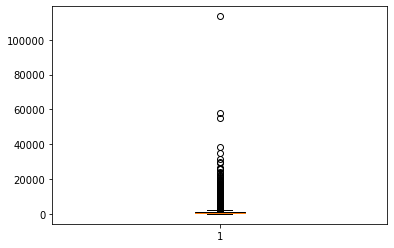

In [32]:
plt.boxplot(data1['total_rech_6'])

In [33]:
data1.shape

(29110, 164)

In [34]:
# we can drop the date attributes as they wont add much value 

date_col = [col for col in data1.columns if 'date' in col]
data1.drop(date_col, axis=1, inplace=True)
[col for col in data1.columns if 'date' in col]

[]

In [35]:
data1.shape

(29110, 158)

In [36]:
drop_unique_val = []

for col in data1.columns:
    if data1[f'{col}'].nunique() == 1:
        drop_unique_val.append(col)

drop_unique_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [37]:
data1.drop(drop_unique_val, axis=1, inplace=True)
data1.shape

(29110, 148)

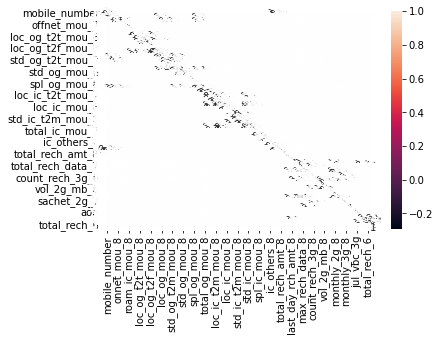

In [38]:
## Checking high correlated features 

data_corr=data1.corr()
sns.heatmap(data_corr,annot=True)
plt.show()

In [39]:
data_corr

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number               1.000000  0.034817  0.030741  0.034163   
arpu_6                      0.034817  1.000000  0.703421  0.645781   
arpu_7                      0.030741  0.703421  1.000000  0.771531   
arpu_8                      0.034163  0.645781  0.771531  1.000000   
onnet_mou_6                 0.010159  0.347725  0.212763  0.152120   
...                              ...       ...       ...       ...   
total_data_rech_amt_8      -0.008026  0.005011  0.030687  0.127511   
total_rech_6               -0.004484  0.420108  0.237058  0.223716   
total_rech_7               -0.004667  0.221932  0.420822  0.295395   
total_rech_8                0.003750  0.218514  0.283556  0.438694   
Churn                      -0.024566  0.056565  0.006278 -0.132059   

                       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number             0.010159     0.005386     0.007863      0.023784   
arpu_6                    0.347725     0.225080     0.196474      0.522732   
arpu_7                    0.212763     0.317806     0.268496      0.356104   
arpu_8                    0.152120     0.229522     0.340762      0.283522   
onnet_mou_6               1.000000     0.758100     0.628326      0.083029   
...                            ...          ...          ...           ...   
total_data_rech_amt_8    -0.077633    -0.075334    -0.057268     -0.090106   
total_rech_6              0.029399    -0.015630    -0.012257      0.078710   
total_rech_7             -0.021851     0.017800     0.023930      0.002850   
total_rech_8             -0.020381     0.006633     0.059343      0.011315   
Churn                     0.081520     0.033259    -0.060836      0.067195   

                       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
mobile_number              0.013254      0.019429       0.010060   
arpu_6                     0.356846      0.306076       0.127841   
arpu_7                     0.488919      0.395434       0.093791   
arpu_8                     0.375256      0.519533       0.089712   
onnet_mou_6                0.034522      0.031210       0.022978   
...                             ...           ...            ...   
total_data_rech_amt_8     -0.089527     -0.052715      -0.016912   
total_rech_6               0.015844      0.017005       0.018258   
total_rech_7               0.058047      0.048254       0.011100   
total_rech_8               0.041022      0.122140       0.014468   
Churn                      0.020928     -0.100166       0.054661   

                       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number              -0.002220       0.004893       0.005558   
arpu_6                      0.087457       0.093508       0.195642   
arpu_7                      0.094122       0.093276       0.135769   
arpu_8                      0.078467       0.109367       0.132259   
onnet_mou_6                 0.024364       0.043578       0.074179   
...                              ...            ...            ...   
total_data_rech_amt_8      -0.017091      -0.017140      -0.022884   
total_rech_6                0.014205       0.017795       0.033759   
total_rech_7                0.012908       0.021983       0.016226   
total_rech_8                0.009251       0.019967       0.022920   
Churn                       0.077518       0.071939       0.067198   

                       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number              -0.001280      -0.002899          0.046456   
arpu_6                      0.148053       0.129704          0.170275   
arpu_7                      0.180123       0.151916          0.105995   
arpu_8                      0.141515       0.198448          0.100172   
onnet_mou_6                 0.074538       0.073027          0.458545   
...                              ...            ...               ...   
total_data_rech_amt_8      -0.018975      -0.018520         -0.022862   
tot

In [40]:
high_corr_value = data_corr[(data_corr > 0.50)]
high_corr_value

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number                    1.0       NaN       NaN       NaN   
arpu_6                           NaN  1.000000  0.703421  0.645781   
arpu_7                           NaN  0.703421  1.000000  0.771531   
arpu_8                           NaN  0.645781  0.771531  1.000000   
onnet_mou_6                      NaN       NaN       NaN       NaN   
...                              ...       ...       ...       ...   
total_data_rech_amt_8            NaN       NaN       NaN       NaN   
total_rech_6                     NaN       NaN       NaN       NaN   
total_rech_7                     NaN       NaN       NaN       NaN   
total_rech_8                     NaN       NaN       NaN       NaN   
Churn                            NaN       NaN       NaN       NaN   

                       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                  NaN          NaN          NaN           NaN   
arpu_6                         NaN          NaN          NaN      0.522732   
arpu_7                         NaN          NaN          NaN           NaN   
arpu_8                         NaN          NaN          NaN           NaN   
onnet_mou_6                    1.0       0.7581     0.628326           NaN   
...                            ...          ...          ...           ...   
total_data_rech_amt_8          NaN          NaN          NaN           NaN   
total_rech_6                   NaN          NaN          NaN           NaN   
total_rech_7                   NaN          NaN          NaN           NaN   
total_rech_8                   NaN          NaN          NaN           NaN   
Churn                          NaN          NaN          NaN           NaN   

                       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
mobile_number                   NaN           NaN            NaN   
arpu_6                          NaN           NaN            NaN   
arpu_7                          NaN           NaN            NaN   
arpu_8                          NaN      0.519533            NaN   
onnet_mou_6                     NaN           NaN            NaN   
...                             ...           ...            ...   
total_data_rech_amt_8           NaN           NaN            NaN   
total_rech_6                    NaN           NaN            NaN   
total_rech_7                    NaN           NaN            NaN   
total_rech_8                    NaN           NaN            NaN   
Churn                           NaN           NaN            NaN   

                       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                    NaN            NaN            NaN   
arpu_6                           NaN            NaN            NaN   
arpu_7                           NaN            NaN            NaN   
arpu_8                           NaN            NaN            NaN   
onnet_mou_6                      NaN            NaN            NaN   
...                              ...            ...            ...   
total_data_rech_amt_8            NaN            NaN            NaN   
total_rech_6                     NaN            NaN            NaN   
total_rech_7                     NaN            NaN            NaN   
total_rech_8                     NaN            NaN            NaN   
Churn                            NaN            NaN            NaN   

                       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                    NaN            NaN               NaN   
arpu_6                           NaN            NaN               NaN   
arpu_7                           NaN            NaN               NaN   
arpu_8                           NaN            NaN               NaN   
onnet_mou_6                      NaN            NaN               NaN   
...                              ...            ...               ...   
total_data_rech_amt_8            NaN            NaN               NaN   
tot

In [41]:
high_corr_value1 = data_corr[(data_corr > 0.60)]
high_corr_value1

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number                    1.0       NaN       NaN       NaN   
arpu_6                           NaN  1.000000  0.703421  0.645781   
arpu_7                           NaN  0.703421  1.000000  0.771531   
arpu_8                           NaN  0.645781  0.771531  1.000000   
onnet_mou_6                      NaN       NaN       NaN       NaN   
...                              ...       ...       ...       ...   
total_data_rech_amt_8            NaN       NaN       NaN       NaN   
total_rech_6                     NaN       NaN       NaN       NaN   
total_rech_7                     NaN       NaN       NaN       NaN   
total_rech_8                     NaN       NaN       NaN       NaN   
Churn                            NaN       NaN       NaN       NaN   

                       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
mobile_number                  NaN          NaN          NaN           NaN   
arpu_6                         NaN          NaN          NaN           NaN   
arpu_7                         NaN          NaN          NaN           NaN   
arpu_8                         NaN          NaN          NaN           NaN   
onnet_mou_6                    1.0       0.7581     0.628326           NaN   
...                            ...          ...          ...           ...   
total_data_rech_amt_8          NaN          NaN          NaN           NaN   
total_rech_6                   NaN          NaN          NaN           NaN   
total_rech_7                   NaN          NaN          NaN           NaN   
total_rech_8                   NaN          NaN          NaN           NaN   
Churn                          NaN          NaN          NaN           NaN   

                       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
mobile_number                   NaN           NaN            NaN   
arpu_6                          NaN           NaN            NaN   
arpu_7                          NaN           NaN            NaN   
arpu_8                          NaN           NaN            NaN   
onnet_mou_6                     NaN           NaN            NaN   
...                             ...           ...            ...   
total_data_rech_amt_8           NaN           NaN            NaN   
total_rech_6                    NaN           NaN            NaN   
total_rech_7                    NaN           NaN            NaN   
total_rech_8                    NaN           NaN            NaN   
Churn                           NaN           NaN            NaN   

                       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
mobile_number                    NaN            NaN            NaN   
arpu_6                           NaN            NaN            NaN   
arpu_7                           NaN            NaN            NaN   
arpu_8                           NaN            NaN            NaN   
onnet_mou_6                      NaN            NaN            NaN   
...                              ...            ...            ...   
total_data_rech_amt_8            NaN            NaN            NaN   
total_rech_6                     NaN            NaN            NaN   
total_rech_7                     NaN            NaN            NaN   
total_rech_8                     NaN            NaN            NaN   
Churn                            NaN            NaN            NaN   

                       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
mobile_number                    NaN            NaN               NaN   
arpu_6                           NaN            NaN               NaN   
arpu_7                           NaN            NaN               NaN   
arpu_8                           NaN            NaN               NaN   
onnet_mou_6                      NaN            NaN               NaN   
...                              ...            ...               ...   
total_data_rech_amt_8            NaN            NaN               NaN   
tot

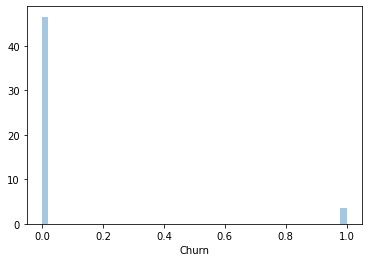

In [45]:
sns.distplot(data1["Churn"],kde=True)


Note- Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 94%

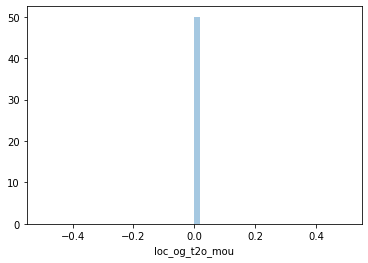

In [46]:
sns.distplot(data2['loc_og_t2o_mou'])
plt.show()

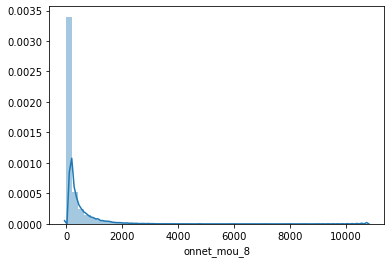

In [47]:
sns.distplot(data2['onnet_mou_8'])
plt.show()

Note- Graph is skewed toward left 

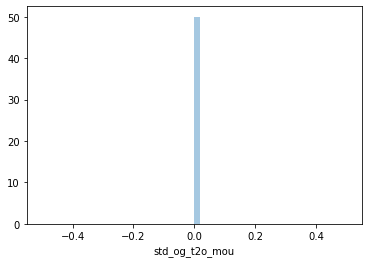

In [48]:
sns.distplot(data2['std_og_t2o_mou'])
plt.show()

In [49]:
drop_col_corr = ['mobile_number','loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns & mobile number (this is not relevant for the further modelling)
data1.drop(drop_col_corr, axis=1, inplace=True)
data1.shape

(29110, 108)

In [50]:
data1.head(10)

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   
33   977.020  2362.833   409.230         0.00         0.00         0.00   
38   363.987   486.558   393.909       248.99       619.96       666.38   
41   482.832   425.764   229.769        86.39       118.88        80.44   
48  1873.271   575.927   179.218      2061.69       881.43       156.91   
53   978.077  1141.296   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
38         88.86         50.58         97.81           0.00           0.00   
41        232.36        280.78        136.69           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.00               0.0              0.00          0.00   
7               0.00               0.0              0.00        422.16   
8               0.00               0.0              7.15        378.09   
21              0.00               0.0              0.00         97.04   
23              0.00               0.0             17.71        131.91   
33              0.00               0.0              0.56          0.00   
38              0.00               0.0              0.00         63.64   
41              0.00               0.0              0.00        283.24   
48              0.06               0.0              0.00       1642.58   
53              2.64               2.4              0.00        357.03   

    loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              6.66             20.08   
8         288.18         63.04              0.00              0.00   
21         94.09        129.74              0.00              0.00   
23        133.68        182.14              0.00              0.00   
33          0.00          0.00              0.00              0.00   
38         33.53         28.44              0.00              0.00   
41        304.46        203.21             34.68             94.89   
48        347.08         95.69              0.00              0.00   
53        300.23        241.61              0.00              0.00   

    std_

In [54]:
data_churn=data1.copy() 
data_churn.shape

(29110, 108)

In [55]:
# Deriving new aggregated features combining offner_mou and onnet_mou

data_churn['total_mou_6'] = data_churn['onnet_mou_6'] + data_churn['offnet_mou_6']
data_churn['total_mou_7'] = data_churn['onnet_mou_7'] + data_churn['offnet_mou_7']
data_churn['total_mou_8'] = data_churn['onnet_mou_8'] + data_churn['offnet_mou_8']

#Removing redundant attributes 

data_churn.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

data_churn.head()

arpu_6    arpu_7    arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0    197.385   214.816   213.803           0.00           0.00           0.00   
7   1069.180  1349.850  3171.480          16.23          33.49          31.64   
8    378.721   492.223   137.362           0.00           0.00           0.00   
21   514.453   597.753   637.760           0.00           0.00           0.00   
23    74.350   193.897   366.966           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  \
0            0.00           0.00           0.00               0.0   
7           23.74          12.59          38.06               0.0   
8            0.00           0.00           0.00               0.0   
21           0.00           0.00           0.00               0.0   
23           0.00           0.00           0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0                0.0              0.00          0.00          0.00   
7                0.0              0.00        422.16        533.91   
8                0.0              7.15        378.09        288.18   
21               0.0              0.00         97.04         94.09   
23               0.0             17.71        131.91        133.68   

    loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79              6.66             20.08             16.68   
8          63.04              0.00              0.00              0.00   
21        129.74              0.00              0.00              0.00   
23        182.14              0.00              0.00              0.00   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0           0.00          0.00          0.00           0.0          0.00   
7          60.86         75.14         77.84           0.0          0.18   
8         130.26        143.48         98.28           0.0          0.00   
21        763.29        934.69        938.79           0.0          0.00   
23          2.36          6.35         39.61           0.0          0.01   

    isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0           0.00           0.0           0.0          0.00          0.0   
7          10.01           4.5           0.0          6.50          0.0   
8           0.00           0.0           0.0         10.23          0.0   
21          0.00           0.0           0.0          0.00          0.0   
23          0.00           0.1           0.0         17.71          0.0   

    og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0           0.0          0.0          0.00          0.00          5.44   
7           0.0          0.0        427.88        355.23        188.04   
8           0.0          0.0         81.43         23.83         15.79   
21          0.0          0.0        125.33         87.68        159.11   
23          0.0          0.0        116.63        174.41        224.21   

    std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2f_mou_6  \
0               0.00              0.00              0.00              0.00   
7              36.89             11.83             30.39             52.19   
8               0.00              0.58              0.10              0.00   
21             14.06              5.98              0.18              0.00   
23              0.51              0.00             13.38              0.00   

    std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  \
0               0.00              0.00          0.00          0.00   
7              34.24             22.21        180.54        173.08   
8               0.00              0.00         22.43          4.66   
21              0.00              0.00         81.76         44.21   
23              0.00              0.00          2.94         14.89

In [56]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in data_churn.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    data_churn[f'gd_ph_{col}'] = ( data_churn[f'{col}_6'] + data_churn[f'{col}_7'] ) / 2
    data_churn.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
data_churn.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    213.803           0.00           0.00              0.00          0.00   
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.00          0.0   
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0           5.44              0.00              0.00          0.00   
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
21        159.11              0.18              0.00        101.93   
23        224.21             13.38              0.00         57.29   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0            0.0          0.00         0.00                 2             252   
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   

    last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                  252                1.0            252.0              0.0   
7                  779                0.0              0.0              0.0   
8                   10                3.0             23.0              3.0   
21                  50                0.0              0.0              0.0   
23                   0                2.0            179.0              0.0   

    count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  monthly_2g_8  \
0               1.0               252.0         5.75             0   
7               0.0                 0.0         0.00             0   
8               0.0                69.0         0.03             0   
21              0.0                 0.0         0.00             0   
23              2.0               270.0         0.01             0   

    sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  aug_vbc_3g  jul_vbc_3g  \
0             0             1            0  968       30.40        0.00   
7             0             0            0  802       57.74       19.38   
8             3             0            0  315       21.03      910.65   
21            0             0            0  720        0.00        0.00   
23            0             1            1  604       40.45       51.86   

    jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_8  total_rech_8  Churn  \
0       101.20        3.58                  252.0         504.0      1   
7        18.74        0.00                    0.0        3638.0      1   
8       122.16        0.00                  207.0         327.0      0   
21        0.00        0.00                    0.0         718.0      0   
23        0.00        0.00                  540.0         979.0      0   

    total_mou_8  gd_ph_total_rech_num  gd_ph_total_rech  gd_ph_sachet_2g  \
0          0.00                   3.5             559.0              0.0   
7        378.20                   5.0            1185.0              0.0   
8        171.56                  20.0             696.0              0.5   
21      1068.53                  24.0             640.0   

In [90]:
# Create new column
data_churn['gd_ph_vbc_3g'] = ( data_churn['jul_vbc_3g'] + data_churn['jun_vbc_3g'] ) / 2

# Drop redundant column
data_churn.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
data_churn['vbc_3g_8'] = data_churn['aug_vbc_3g']
data_churn.drop('aug_vbc_3g', axis=1, inplace=True)

data_churn.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    213.803           0.00           0.00              0.00          0.00   
7   3171.480          31.64          38.06              0.00        255.79   
8    137.362           0.00           0.00              7.15         63.04   
21   637.760           0.00           0.00              0.00        129.74   
23   366.966           0.00           0.00             17.71        182.14   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.00          0.0   
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0           5.44              0.00              0.00          0.00   
7         188.04             30.39             22.21        193.94   
8          15.79              0.10              0.00          0.75   
21        159.11              0.18              0.00        101.93   
23        224.21             13.38              0.00         57.29   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0            0.0          0.00         0.00                 2             252   
7            0.0         31.59        15.14                 7            1580   
8            0.0          0.00         0.00                14              30   
21           0.0          0.00         0.00                27              50   
23           0.0          3.74        13.06                 4             179   

    last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                  252                1.0            252.0              0.0   
7                  779                0.0              0.0              0.0   
8                   10                3.0             23.0              3.0   
21                  50                0.0              0.0              0.0   
23                   0                2.0            179.0              0.0   

    count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  monthly_2g_8  \
0               1.0               252.0         5.75             0   
7               0.0                 0.0         0.00             0   
8               0.0                69.0         0.03             0   
21              0.0                 0.0         0.00             0   
23              2.0               270.0         0.01             0   

    sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  total_data_rech_amt_8  \
0             0             1            0  968                  252.0   
7             0             0            0  802                    0.0   
8             3             0            0  315                  207.0   
21            0             0            0  720                    0.0   
23            0             1            1  604                  540.0   

    total_rech_8  Churn  total_mou_8  gd_ph_std_og_t2f_mou  gd_ph_isd_og_mou  \
0          504.0      1         0.00                  0.00             0.000   
7         3638.0      1       378.20                 13.37             0.090   
8          327.0      0       171.56                  0.00             0.000   
21         718.0      0      1068.53                  0.00             0.000   
23         979.0      0       239.47                  0.00             0.005   

    gd_ph_std_ic_t2t_mou  gd_ph_og_others  gd_ph_loc_og_mou  \
0                  0.000              0.0             0.000   
7                 24.360              0.0           478.035   
8                  0.290              0.0           333.135   
21                10.020              0.0            95.565   
23               

In [57]:
data_churn.shape

data_churn.reset_index(inplace=True, drop=True)
data_churn.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   213.803           0.00           0.00              0.00          0.00   
1  3171.480          31.64          38.06              0.00        255.79   
2   137.362           0.00           0.00              7.15         63.04   
3   637.760           0.00           0.00              0.00        129.74   
4   366.966           0.00           0.00             17.71        182.14   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0              0.00          0.00          0.00          0.00          0.0   
1             16.68         77.84         10.01          6.50          0.0   
2              0.00         98.28          0.00         10.23          0.0   
3              0.00        938.79          0.00          0.00          0.0   
4              0.00         39.61          0.00         17.71          0.0   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0          5.44              0.00              0.00          0.00   
1        188.04             30.39             22.21        193.94   
2         15.79              0.10              0.00          0.75   
3        159.11              0.18              0.00        101.93   
4        224.21             13.38              0.00         57.29   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0          0.00         0.00                 2             252   
1           0.0         31.59        15.14                 7            1580   
2           0.0          0.00         0.00                14              30   
3           0.0          0.00         0.00                27              50   
4           0.0          3.74        13.06                 4             179   

   last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                 252                1.0            252.0              0.0   
1                 779                0.0              0.0              0.0   
2                  10                3.0             23.0              3.0   
3                  50                0.0              0.0              0.0   
4                   0                2.0            179.0              0.0   

   count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  monthly_2g_8  \
0              1.0               252.0         5.75             0   
1              0.0                 0.0         0.00             0   
2              0.0                69.0         0.03             0   
3              0.0                 0.0         0.00             0   
4              2.0               270.0         0.01             0   

   sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  aug_vbc_3g  jul_vbc_3g  \
0            0             1            0  968       30.40        0.00   
1            0             0            0  802       57.74       19.38   
2            3             0            0  315       21.03      910.65   
3            0             0            0  720        0.00        0.00   
4            0             1            1  604       40.45       51.86   

   jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_8  total_rech_8  Churn  \
0      101.20        3.58                  252.0         504.0      1   
1       18.74        0.00                    0.0        3638.0      1   
2      122.16        0.00                  207.0         327.0      0   
3        0.00        0.00                    0.0         718.0      0   
4        0.00        0.00                  540.0         979.0      0   

   total_mou_8  gd_ph_total_rech_num  gd_ph_total_rech  gd_ph_sachet_2g  \
0         0.00                   3.5             559.0              0.0   
1       378.20                   5.0            1185.0              0.0   
2       171.56                  20.0             696.0              0.5   
3      1068.53                  24.0             640.0              0.0   
4       239.47                   4

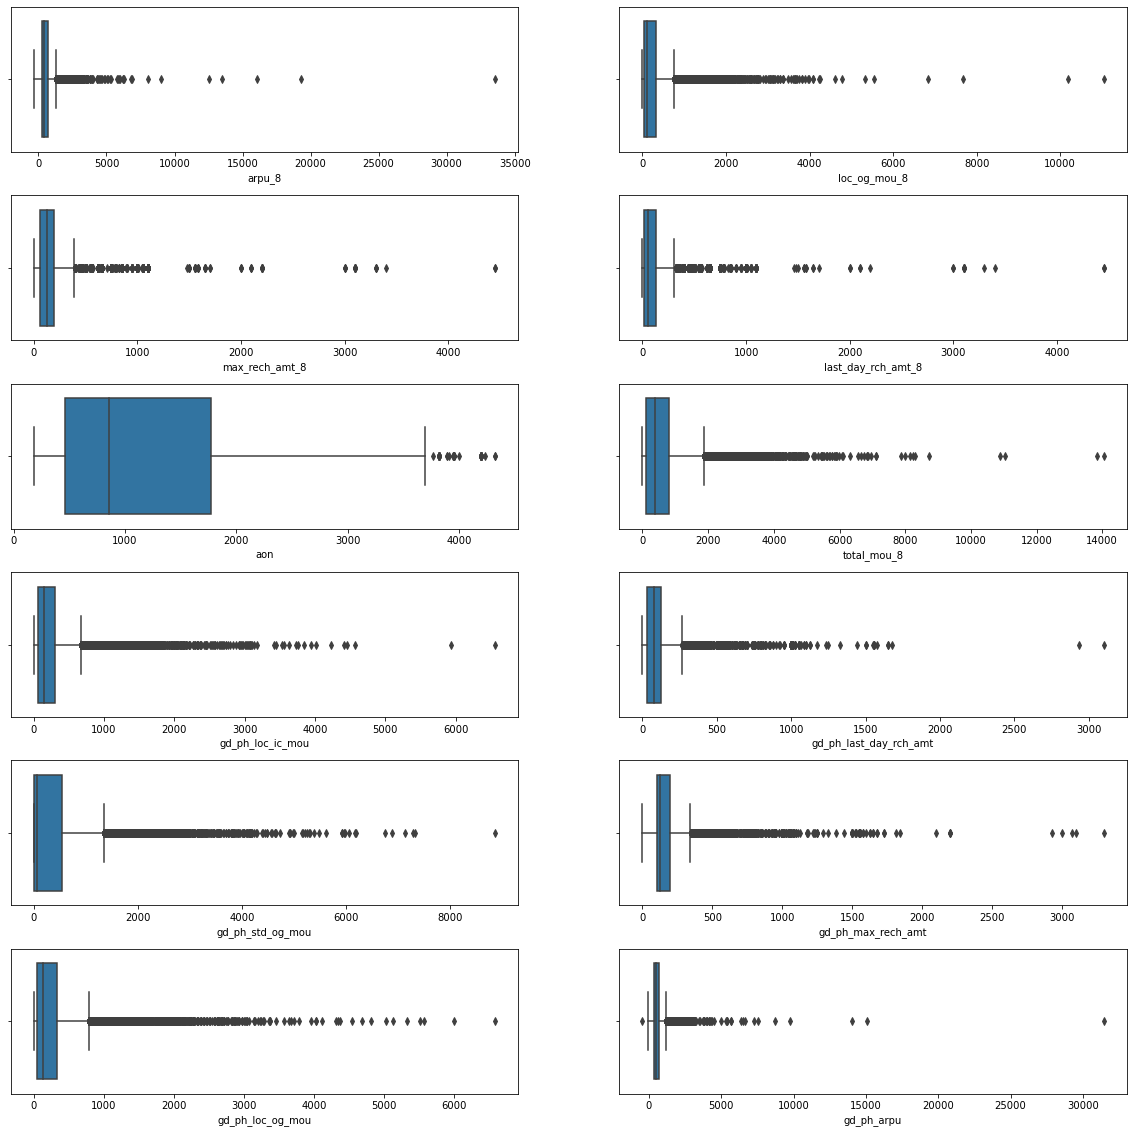

In [58]:
# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(data_churn[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()


From the box plot above the limits could be derived and capped (below after the EDA is completed) 


(0.0, 10.0)

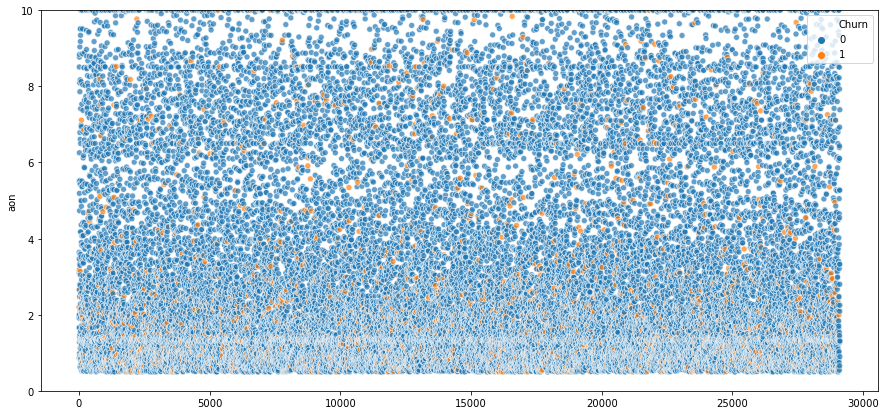

In [59]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=data_churn['aon'] / 365, x=data_churn.index, hue=data_churn.Churn, alpha=0.7)
plt.ylim(0,10)


Note - Above scatter plot may not depict anything specific , however looks like most of the customer would churn somewheere around 4 months tenure 

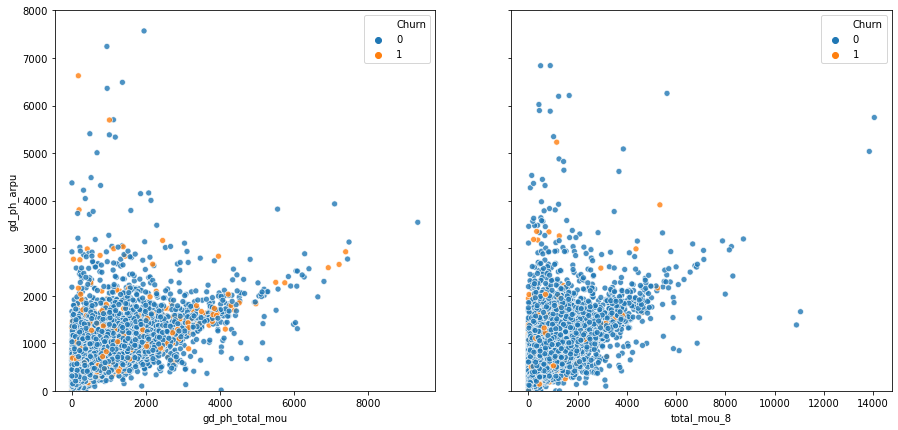

In [60]:
## Analyzing Volume based cost vs revuenue impact 


fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=data_churn, ax=axes[0], hue='Churn', alpha=0.8)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=data_churn, ax=axes[1], hue='Churn', alpha=0.8)

plt.ylim(0,8000) 
plt.show()

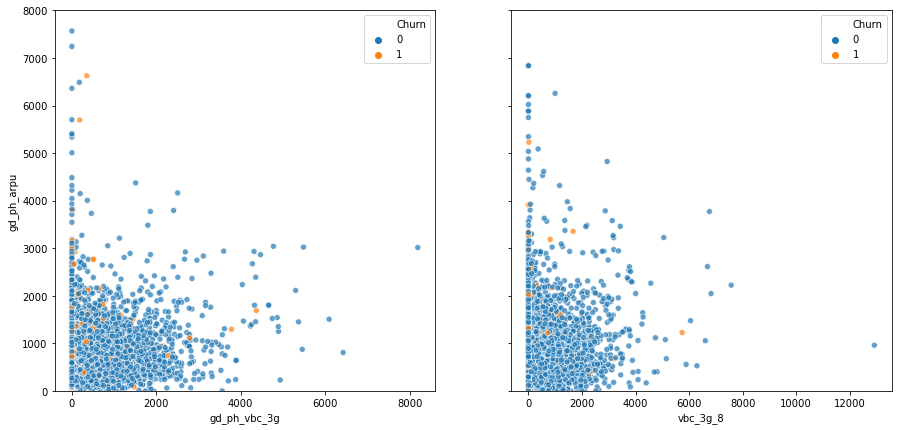

In [100]:
## Analyzing total mou(minutes of usage) vs revuenue impact 
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=data_churn, ax=axes[0], hue='Churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=data_churn, ax=axes[1], hue='Churn', alpha=0.7)

plt.ylim(0,8000) 
plt.show()

In [61]:
data_churn.head(5)

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   213.803           0.00           0.00              0.00          0.00   
1  3171.480          31.64          38.06              0.00        255.79   
2   137.362           0.00           0.00              7.15         63.04   
3   637.760           0.00           0.00              0.00        129.74   
4   366.966           0.00           0.00             17.71        182.14   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0              0.00          0.00          0.00          0.00          0.0   
1             16.68         77.84         10.01          6.50          0.0   
2              0.00         98.28          0.00         10.23          0.0   
3              0.00        938.79          0.00          0.00          0.0   
4              0.00         39.61          0.00         17.71          0.0   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0          5.44              0.00              0.00          0.00   
1        188.04             30.39             22.21        193.94   
2         15.79              0.10              0.00          0.75   
3        159.11              0.18              0.00        101.93   
4        224.21             13.38              0.00         57.29   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0          0.00         0.00                 2             252   
1           0.0         31.59        15.14                 7            1580   
2           0.0          0.00         0.00                14              30   
3           0.0          0.00         0.00                27              50   
4           0.0          3.74        13.06                 4             179   

   last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                 252                1.0            252.0              0.0   
1                 779                0.0              0.0              0.0   
2                  10                3.0             23.0              3.0   
3                  50                0.0              0.0              0.0   
4                   0                2.0            179.0              0.0   

   count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  monthly_2g_8  \
0              1.0               252.0         5.75             0   
1              0.0                 0.0         0.00             0   
2              0.0                69.0         0.03             0   
3              0.0                 0.0         0.00             0   
4              2.0               270.0         0.01             0   

   sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  aug_vbc_3g  jul_vbc_3g  \
0            0             1            0  968       30.40        0.00   
1            0             0            0  802       57.74       19.38   
2            3             0            0  315       21.03      910.65   
3            0             0            0  720        0.00        0.00   
4            0             1            1  604       40.45       51.86   

   jun_vbc_3g  sep_vbc_3g  total_data_rech_amt_8  total_rech_8  Churn  \
0      101.20        3.58                  252.0         504.0      1   
1       18.74        0.00                    0.0        3638.0      1   
2      122.16        0.00                  207.0         327.0      0   
3        0.00        0.00                    0.0         718.0      0   
4        0.00        0.00                  540.0         979.0      0   

   total_mou_8  gd_ph_total_rech_num  gd_ph_total_rech  gd_ph_sachet_2g  \
0         0.00                   3.5             559.0              0.0   
1       378.20                   5.0            1185.0              0.0   
2       171.56                  20.0             696.0              0.5   
3      1068.53                  24.0             640.0              0.0   
4       239.47                   4

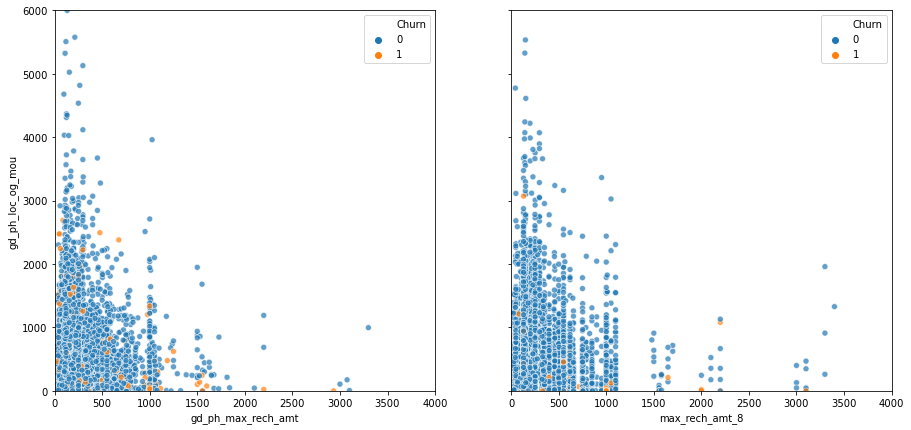

In [62]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=data_churn, ax=axes[0],
                hue='Churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=data_churn, ax=axes[1], hue='Churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

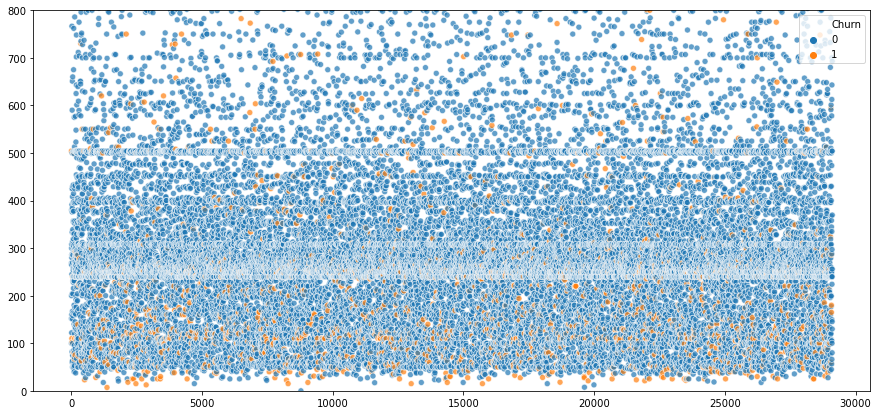

In [63]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=data_churn.index, y=data_churn['gd_ph_max_rech_amt'] + data_churn['max_rech_amt_8'],
                hue=data_churn['Churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

Note- Above shows MAx reacharge ~ 250 are more into churn 

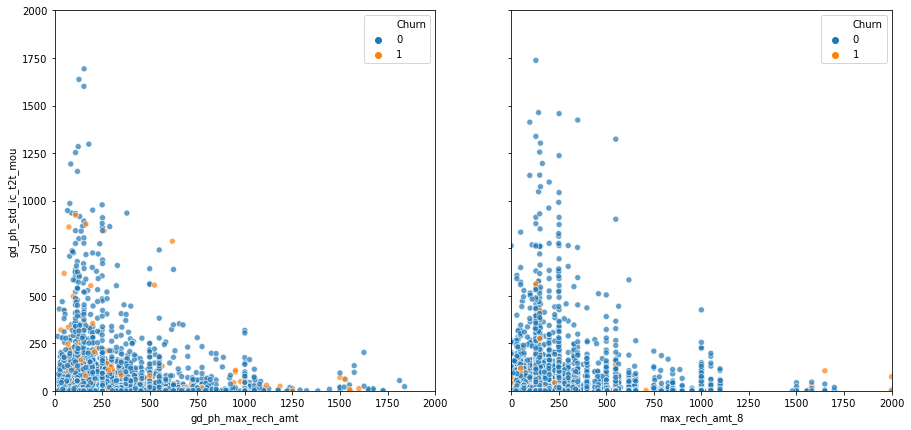

In [146]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=data_churn, ax=axes[0],
                hue='Churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=data_churn, ax=axes[1], hue='Churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

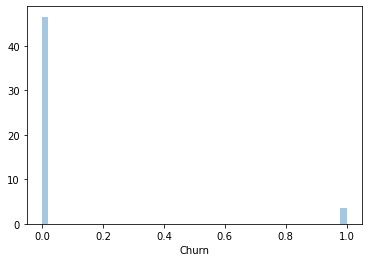

In [64]:
sns.distplot(data_churn['Churn'])
plt.show()

Note- Above graph shows the data is highly inbalanced and will be handled 

### Capping Outliers 

In [65]:

# cap outliers in the numeric columns (based on box plot above)

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    data_churn[col] = data_churn[col].apply(lambda x : x if x < value else value)

data_churn[col_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8  aon  \
0   213.803          0.00             252                 252  968   
1  3171.480        255.79            1000                 779  802   
2   137.362         63.04              30                  10  315   
3   637.760        129.74              50                  50  720   
4   366.966        182.14             179                   0  604   

   total_mou_8  gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
0         0.00             0.000                   252.0             0.000   
1       378.20           391.555                     0.0            68.000   
2       171.56            52.630                    25.0           136.870   
3      1068.53           106.505                    25.0           848.990   
4       239.47           145.520                    89.5             4.355   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
0               252.0             0.000    206.1005  
1              1185.0           478.035   1209.5150  
2               122.0           333.135    435.4720  
3                50.0            95.565    556.1030  
4                89.5           132.795    134.1235

In [67]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = data_churn['Churn']
X = data_churn.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [70]:
data_churn.Churn.value_counts()

0    27100
1     2010
Name: Churn, dtype: int64

In [71]:
# Use SMOTE to take care of class imbalance 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

ImportError: cannot import name '_ParamsValidationMixin' from 'imblearn.base' (C:\Users\sanje\anaconda3\lib\site-packages\imblearn\base.py)

In [72]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\sanje\anaconda3\lib\site-packages (0.10.1)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: joblib>=1.1.1 in c:\users\sanje\anaconda3\lib\site-packages (from imbalanced-learn) (1.2.0)



Note- I haev also tried installing the package through the anaconda prompt , but my computer didnot respond .Attached snapshot in the ppt..but having this balanced would have given better results

In [74]:
# Use SMOTE to take care of class imbalance 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

ImportError: cannot import name '_ParamsValidationMixin' from 'imblearn.base' (C:\Users\sanje\anaconda3\lib\site-packages\imblearn\base.py)

In [75]:
X.shape

(29110, 71)

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X)
X_pca.shape

(29110, 25)

In [77]:
import statsmodels.api as sm

In [78]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20377
Model:                            GLM   Df Residuals:                    20311
Model Family:                Binomial   Df Model:                           65
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3493.3
Date:                Mon, 13 Mar 2023   Deviance:                       6986.5
Time:                        17:41:44   Pearson chi2:                 6.30e+09
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0585      0.107     -9.912      0.000      -1.268      -0.849
arpu_8                        0.0005      0.000      1.324      0.186      -0.000       0.001
roam_ic_mou_8                -0.0004      0.000     -0.798      0.425      -0.001       0.001
roam_og_mou_8                 0.0010      0.001      1.995      0.046    1.86e-05       0.002
loc_og_t2c_mou_8              0.0048      0.007      0.650      0.515      -0.010       0.019
loc_og_mou_8                 -0.0014      0.001     -2.368      0.018      -0.002      -0.000
std_og_t2f_mou_8             -0.0094      0.009     -1.003      0.316      -0.028       0.009
std_og_mou_8                 -0.0003      0.000     -0.675      0.500      -0.001       0.001
isd_og_mou_8                 -0.0002      0.003     -0.074      0.941      -0.006       0.005
spl_og_mou_8                 -0.0053      0.004     -1.366      0.172      -0.013       0.002
og_others_8                  -0.7452      0.792     -0.941      0.347      -2.297       0.807
loc_ic_mou_8                 -0.0055      0.001    -10.619      0.000      -0.007      -0.005
std_ic_t2t_mou_8             -0.0036      0.002     -1.982      0.048      -0.007   -3.92e-05
std_ic_t2f_mou_8             -0.0088      0.008     -1.108      0.268      -0.024       0.007
std_ic_mou_8                 -0.0016      0.001     -1.904      0.057      -0.003    4.77e-05
spl_ic_mou_8                 -2.9158      0.551     -5.291      0.000      -3.996      -1.836
isd_ic_mou_8                 -0.0026      0.001     -2.380      0.017      -0.005      -0.000
ic_others_8                   0.0130      0.006      2.205      0.027       0.001       0.025
total_rech_num_8             -0.0466      0.009     -5.333      0.000      -0.064      -0.029
max_rech_amt_8                0.0001      0.000      0.321      0.749      -0.001       0.001
last_day_rch_amt_8           -0.0048      0.001     -8.685      0.000      -0.006      -0.004
total_rech_data_8            -0.3255      0.063     -5.155      0.000      -0.449      -0.202
max_rech_data_8              -0.0024      0.001     -1.782      0.075      -0.005       0.000
count_rech_2g_8              -0.1959      0.051     -3.814      0.000      -0.297      -0.095
count_rech_3g_8              -0.1296      0.056     -2.329      0.020      -0.239      -0.021
av_rech_amt_data_8            0.0003      0.001      0.274      0.784      -0.002       0.002
vol_2g_mb_8                  -0.0010      0.000     -3.464      0.001      -0.002      -0.000
monthly_2g_8                 -0.4182      0.136     -3.067      0.002      -0.685      -0.151
sachet_2g_8                   0.2223      0.091      2.442      0.015       0.044       0.401
monthly_3g_8                 -0.2336      0.120     -1.943      0.052      

In [87]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    18970
1     1407
Name: Churn, dtype: int64


index     Churn
0      0  0.930952
1      1  0.069048

In [192]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
## Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
## Doing the PCA on the train data
pca.fit(X_train)
pca.components_

array([[ 5.22326379e-02,  8.93827743e-05,  6.48961734e-04, ...,
         1.37757114e-03,  4.06771192e-03, -1.25220012e-06],
       [-4.16258079e-02, -1.32470843e-05, -1.26319947e-03, ...,
         2.40119602e-03,  6.73487655e-03,  1.10402748e-05],
       [ 2.34595987e-01,  3.72766637e-03,  1.25985344e-02, ...,
         1.25228723e-02,  1.36019174e-02,  7.58541990e-05],
       ...,
       [ 0.00000000e+00, -6.71954472e-18, -8.07121307e-18, ...,
         7.17779849e-17, -1.76821384e-17,  8.56998743e-17],
       [ 0.00000000e+00, -1.16943743e-16, -1.84594118e-16, ...,
         1.03878371e-16, -8.88334409e-17,  3.03408169e-17],
       [-0.00000000e+00, -5.84518636e-16, -1.23793675e-16, ...,
         2.98478282e-16, -1.72969838e-16,  4.65354987e-17]])

In [207]:
## Verifying PC and variables
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

PC1       PC2             Feature
0   5.226801e-02 -0.041287              arpu_8
1   8.664529e-05 -0.000023       roam_ic_mou_8
2   6.517095e-04 -0.001226       roam_og_mou_8
3   7.687773e-05 -0.000146    loc_og_t2c_mou_8
4   2.457661e-03 -0.017349        loc_og_mou_8
5  -2.140418e-05 -0.000085    std_og_t2f_mou_8
6   3.731204e-04 -0.069653        std_og_mou_8
7   2.229538e-03  0.001040        isd_og_mou_8
8   4.419104e-04 -0.000852        spl_og_mou_8
9  -1.394188e-07 -0.000004         og_others_8
10  1.269374e-03 -0.009292        loc_ic_mou_8
11  2.482290e-04 -0.001195    std_ic_t2t_mou_8
12 -2.330065e-05 -0.000010    std_ic_t2f_mou_8
13  6.918808e-04 -0.003551        std_ic_mou_8
14  3.728996e-07 -0.000001        spl_ic_mou_8
15  7.683113e-04 -0.000154        isd_ic_mou_8
16 -2.881269e-06 -0.000097         ic_others_8
17  9.328723e-04 -0.000818    total_rech_num_8
18  6.880944e-03 -0.002900      max_rech_amt_8
19  3.274199e-03 -0.003049  last_day_rch_amt_8

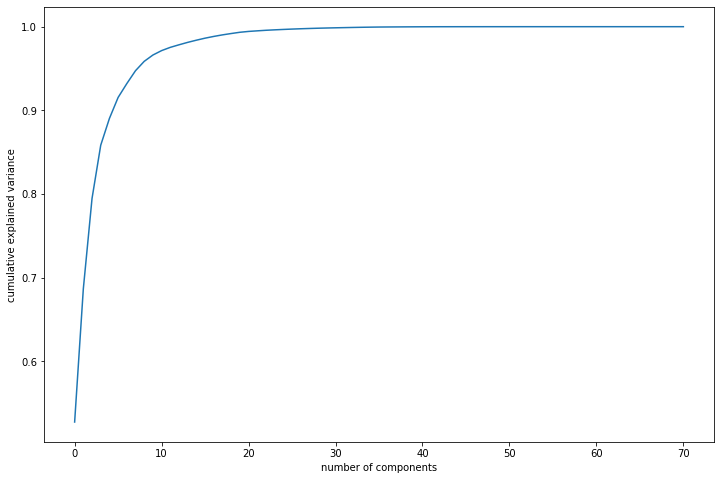

In [89]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [90]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=42)

In [91]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(20377, 15)

In [92]:
# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

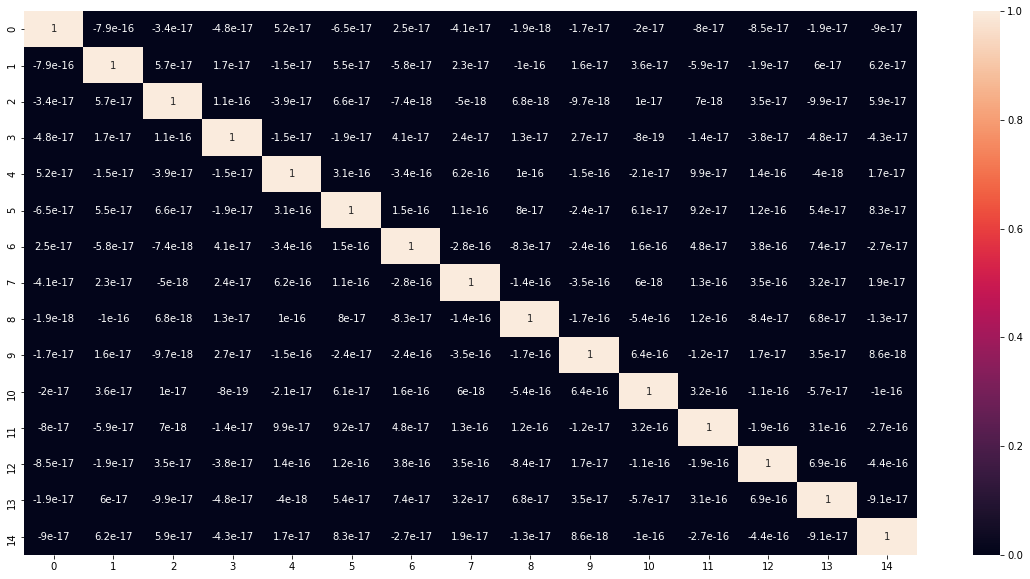

In [93]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_pca.transpose()), annot=True)

In [94]:
lreg = LogisticRegression(random_state=42)
model=lreg.fit(X_train_pca, y_train)

In [95]:
round(model.score(X_train_pca, y_train) * 100, 2)

93.21

In [96]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8733, 15)

In [97]:
y_pred = lreg.predict(X_test_pca)

In [98]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9346158250314898
F1 score:  0.18311874105865522
Recall:  0.10613598673300166
Precision:  0.6666666666666666

 clasification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      8130
           1       0.67      0.11      0.18       603

    accuracy                           0.93      8733
   macro avg       0.80      0.55      0.57      8733
weighted avg       0.92      0.93      0.91      8733


 confussion matrix:
 [[8098   32]
 [ 539   64]]


In [99]:
# Predicted probabilities
y_pred = lreg.predict_proba(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_df = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df.head()

1
0  0.031558
1  0.071164
2  0.100396
3  0.030330
4  0.037264

In [100]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

Churn
21544      0
21875      0
26859      0
13287      0
27007      0

In [101]:
# Putting index
y_train_df['I'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})



# Let's see the head of y_pred_final
y_pred_final.head(15)

Churn      I  Churn_Prob
0       0  21544    0.031558
1       0  21875    0.071164
2       0  26859    0.100396
3       0  13287    0.030330
4       0  27007    0.037264
5       0  17685    0.000076
6       0  28976    0.075759
7       0   2170    0.009589
8       0  28613    0.025215
9       0   8870    0.016677
10      1   9496    0.378625
11      0  15798    0.001053
12      0  28927    0.005450
13      0   2022    0.017131
14      0  24260    0.055487

In [102]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

Churn      I  Churn_Prob  Predicted
0      0  21544    0.031558          0
1      0  21875    0.071164          0
2      0  26859    0.100396          0
3      0  13287    0.030330          0
4      0  27007    0.037264          0

In [103]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

Churn      I  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0  21544    0.031558          0    1    0    0    0    0    0    0   
1      0  21875    0.071164          0    1    0    0    0    0    0    0   
2      0  26859    0.100396          0    1    1    0    0    0    0    0   
3      0  13287    0.030330          0    1    0    0    0    0    0    0   
4      0  27007    0.037264          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [104]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Predicted)
confusion

array([[18865,   105],
       [ 1279,   128]], dtype=int64)

In [105]:
print ('Accuracy: ', round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Predicted), 4) * 100)


print ('\n confussion matrix:\n',confusion_matrix(y_pred_final.Churn, y_pred_final.Predicted))

Accuracy:  93.21000000000001

 confussion matrix:
 [[18865   105]
 [ 1279   128]]


In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
sensitivity=round(TP / float(TP+FN), 4) * 100
print(sensitivity)



9.1


In [110]:
round(TN / float(TN+FP), 4) * 100

99.45

In [111]:
round(FP/ float(TN+FP), 4) * 100

0.5499999999999999

In [112]:
round(TP / float(TP+FP), 4)* 100

54.94

In [113]:
round(TN / float(TN+ FN), 4) * 100

93.65

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

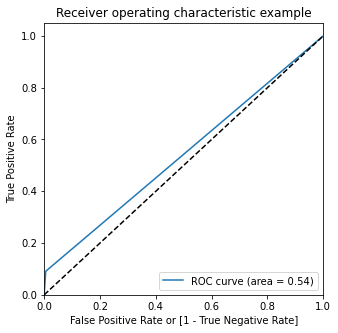

In [115]:
draw_roc(y_pred_final.Churn, y_pred_final.Predicted)

In [116]:
# Let's create cut off matrix based on different values we have calculated
from sklearn.metrics import precision_score, recall_score

cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm))
    Accuracy = (cm[0,0] + cm[1,1]) / total1
    
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    Precision = precision_score(y_pred_final.Churn, y_pred_final[i])
    Recall = recall_score(y_pred_final.Churn, y_pred_final[i])
    cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

cutoffmatrix_df

Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.069048     1.000000     0.000000   0.069048  1.000000
0.1          0.1  0.833832     0.733475     0.841276   0.255256  0.733475
0.2          0.2  0.918388     0.538024     0.946600   0.427684  0.538024
0.3          0.3  0.930559     0.334755     0.974750   0.495789  0.334755
0.4          0.4  0.932277     0.181947     0.987928   0.527835  0.181947
0.5          0.5  0.932080     0.090974     0.994465   0.549356  0.090974
0.6          0.6  0.931737     0.051173     0.997048   0.562500  0.051173
0.7          0.7  0.931491     0.027008     0.998577   0.584615  0.027008
0.8          0.8  0.931393     0.014925     0.999367   0.636364  0.014925
0.9          0.9  0.931246     0.006397     0.999842   0.750000  0.006397

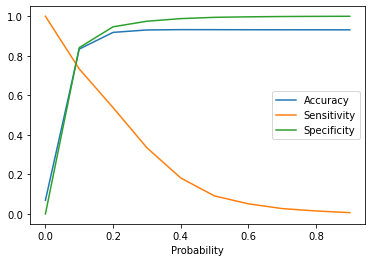

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [118]:
##from the ROC curve ,looks like 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

Churn      I  Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0  21544    0.031558          0    1    0    0    0    0    0    0   
1      0  21875    0.071164          0    1    0    0    0    0    0    0   
2      0  26859    0.100396          1    1    1    0    0    0    0    0   
3      0  13287    0.030330          0    1    0    0    0    0    0    0   
4      0  27007    0.037264          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.Predicted)
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
round(TP / float(TP+FN), 4) * 100

73.35000000000001

In [121]:
round(TN / float(TN+ FN), 4) * 100

97.7

In [122]:
round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.Predicted), 4) * 100

83.38

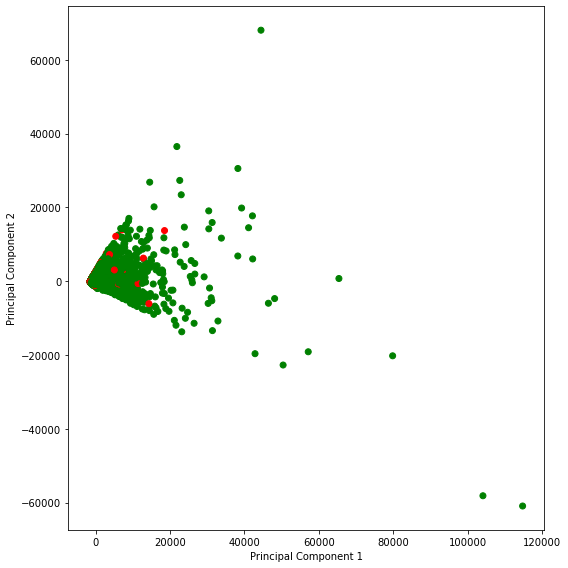

In [123]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### PCA Evaluation 

In [124]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8733, 15)

In [125]:
# Making prediction on the test data
pred_prob_test = model.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test))

'0.86'

In [126]:
# Predicted test probabilities
y_test_pred = lreg.predict_proba(X_test_pca)
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_df.head()

1
0  0.246604
1  0.000156
2  0.008648
3  0.013340
4  0.022538

In [127]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting 'I' to index
y_test_df['I'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df], axis=1)
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Let's see the head of y_test_pred_final
y_test_pred_final.head()
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
# Let's see the head
y_test_pred_final.head()

Churn      I  Churn_Prob  Predicted
0      1   3535    0.246604          1
1      0  22086    0.000156          0
2      0  23438    0.008648          0
3      0   9813    0.013340          0
4      0  14182    0.022538          0

In [128]:

round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100

83.67

In [129]:
confusion2=metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted )

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
Recall =round(TP / float(TP+FN), 4) * 100
print(Recall)
Precision=round(TP / float(TP+FP), 4) * 100
print(Precision)

74.46000000000001
26.090000000000003


In [133]:
round(precision_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100

26.090000000000003

Feature Selection fthrough RFE and testing accuracy through VIF .For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [134]:

y = data_churn['Churn']
X = data_churn.drop('Churn', axis=1)
   

In [135]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

In [136]:
# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [137]:
rfe_col = X.columns[rfe.support_]
rfe_col


Index(['loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'og_others_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8',
       'monthly_2g_8', 'sachet_2g_8', 'sachet_3g_8', 'sep_vbc_3g',
       'gd_ph_sachet_2g', 'gd_ph_spl_og_mou', 'gd_ph_total_rech_data',
       'gd_ph_monthly_3g', 'gd_ph_sachet_3g', 'gd_ph_count_rech_3g',
       'gd_ph_count_rech_2g', 'gd_ph_monthly_2g', 'gd_ph_spl_ic_mou',
       'gd_ph_loc_og_t2c_mou'],
      dtype='object')

In [138]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20377
Model:                            GLM   Df Residuals:                    20356
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3900.7
Date:                Mon, 13 Mar 2023   Deviance:                       7801.3
Time:                        18:05:40   Pearson chi2:                 3.60e+10
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6400      0.058    -10.969      0.000      -0.754      -0.526
loc_og_t2c_mou_8          0.0135      0.008      1.690      0.091      -0.002       0.029
std_og_t2f_mou_8         -0.0211      0.009     -2.371      0.018      -0.039      -0.004
spl_og_mou_8             -0.0175      0.004     -3.977      0.000      -0.026      -0.009
og_others_8              -0.6990      0.796     -0.879      0.380      -2.259       0.860
loc_ic_mou_8             -0.0082      0.000    -20.947      0.000      -0.009      -0.007
std_ic_t2f_mou_8         -0.0113      0.008     -1.487      0.137      -0.026       0.004
spl_ic_mou_8             -3.1050      0.548     -5.667      0.000      -4.179      -2.031
total_rech_num_8         -0.0564      0.005    -10.273      0.000      -0.067      -0.046
total_rech_data_8        -0.7561      0.059    -12.860      0.000      -0.871      -0.641
count_rech_2g_8          -0.1526      0.058     -2.635      0.008      -0.266      -0.039
count_rech_3g_8          -0.6035      0.089     -6.754      0.000      -0.779      -0.428
monthly_2g_8             -0.7500      0.118     -6.334      0.000      -0.982      -0.518
sachet_2g_8               0.5974      0.076      7.883      0.000       0.449       0.746
sachet_3g_8               1.0003      0.161      6.210      0.000       0.685       1.316
sep_vbc_3g               -0.0232      0.006     -4.068      0.000      -0.034      -0.012
gd_ph_sachet_2g           0.1910      0.050      3.833      0.000       0.093       0.289
gd_ph_spl_og_mou          0.0135      0.003      5.347      0.000       0.009       0.019
gd_ph_total_rech_data    -0.0293      0.024     -1.225      0.220      -0.076       0.018
gd_ph_monthly_3g         -0.0347      0.057     -0.606      0.545      -0.147       0.078
gd_ph_sachet_3g           0.1304      0.045      2.903      0.004       0.042       0.219
gd_ph_count_rech_3g       0.0958      0.026      3.728      0.000       0.045       0.146
gd_ph_count_rech_2g      -0.1251      0.032     -3.926      0.000      -0.188      -0.063
gd_ph_monthly_2g         -0.3161      0.079     -4.000      0.000      -0.471      -0.161
gd_ph_spl_ic_mou          0.3995      0.252      1.584      0.113      -0.095       0.894
gd_ph_loc_og_t2c_mou     -0.0151      0.005     -2.899      0.004      -0.025      -0.005
=========================================================================================
"""

In [140]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(5)

Churn  Churn_Prob  predicted
0      0    0.039536          0
1      0    0.091943          0
2      0    0.103504          0
3      0    0.018546          0
4      0    0.017129          0

In [142]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[18963     7]
 [ 1389    18]]

Accuracy : 0.9314913873484811


In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12            sachet_2g_8   inf
22       gd_ph_monthly_2g   inf
21    gd_ph_count_rech_2g   inf
20    gd_ph_count_rech_3g   inf
19        gd_ph_sachet_3g   inf
8       total_rech_data_8   inf
9         count_rech_2g_8   inf
10        count_rech_3g_8   inf
11           monthly_2g_8   inf
18       gd_ph_monthly_3g   inf
17  gd_ph_total_rech_data   inf
15        gd_ph_sachet_2g   inf
13            sachet_3g_8  8.46
2            spl_og_mou_8  2.06
16       gd_ph_spl_og_mou  2.04
7        total_rech_num_8  1.94
24   gd_ph_loc_og_t2c_mou  1.84
0        loc_og_t2c_mou_8  1.82
4            loc_ic_mou_8  1.41
23       gd_ph_spl_ic_mou  1.12
6            spl_ic_mou_8  1.10
1        std_og_t2f_mou_8  1.08
5        std_ic_t2f_mou_8  1.08
14             sep_vbc_3g  1.06
3             og_others_8  1.00

In [144]:
rfe_col = rfe_col.drop('sachet_3g_8', 1)

In [145]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20377
Model:                            GLM   Df Residuals:                    20357
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3920.8
Date:                Mon, 13 Mar 2023   Deviance:                       7841.7
Time:                        18:14:09   Pearson chi2:                 6.72e+10
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6455      0.058    -11.049      0.000      -0.760      -0.531
loc_og_t2c_mou_8          0.0134      0.008      1.694      0.090      -0.002       0.029
std_og_t2f_mou_8         -0.0211      0.009     -2.369      0.018      -0.039      -0.004
spl_og_mou_8             -0.0174      0.004     -3.961      0.000      -0.026      -0.009
og_others_8              -0.6831      0.791     -0.864      0.388      -2.233       0.866
loc_ic_mou_8             -0.0082      0.000    -21.031      0.000      -0.009      -0.007
std_ic_t2f_mou_8         -0.0115      0.008     -1.522      0.128      -0.026       0.003
spl_ic_mou_8             -3.1092      0.548     -5.671      0.000      -4.184      -2.035
total_rech_num_8         -0.0562      0.005    -10.231      0.000      -0.067      -0.045
total_rech_data_8        -0.5150      0.040    -12.940      0.000      -0.593      -0.437
count_rech_2g_8          -0.2958      0.051     -5.781      0.000      -0.396      -0.195
count_rech_3g_8          -0.2192      0.055     -3.970      0.000      -0.327      -0.111
monthly_2g_8             -0.8130      0.118     -6.910      0.000      -1.044      -0.582
sachet_2g_8               0.5172      0.074      6.956      0.000       0.371       0.663
sep_vbc_3g               -0.0232      0.006     -4.074      0.000      -0.034      -0.012
gd_ph_sachet_2g           0.2033      0.050      4.081      0.000       0.106       0.301
gd_ph_spl_og_mou          0.0137      0.003      5.399      0.000       0.009       0.019
gd_ph_total_rech_data    -0.0547      0.024     -2.255      0.024      -0.102      -0.007
gd_ph_monthly_3g         -0.2207      0.053     -4.173      0.000      -0.324      -0.117
gd_ph_sachet_3g           0.2833      0.040      7.023      0.000       0.204       0.362
gd_ph_count_rech_3g       0.0627      0.026      2.390      0.017       0.011       0.114
gd_ph_count_rech_2g      -0.1174      0.032     -3.697      0.000      -0.180      -0.055
gd_ph_monthly_2g         -0.3207      0.079     -4.072      0.000      -0.475      -0.166
gd_ph_spl_ic_mou          0.4180      0.244      1.712      0.087      -0.061       0.897
gd_ph_loc_og_t2c_mou     -0.0152      0.005     -2.932      0.003      -0.025      -0.005
=========================================================================================
"""

In [149]:
# Predict on train data - 2nd iteration

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(10)

Churn  Churn_Prob  predicted
0      0    0.039111          0
1      0    0.091664          0
2      0    0.143870          0
3      0    0.018442          0
4      0    0.015395          0
5      0    0.000046          0
6      0    0.095950          0
7      0    0.008996          0
8      0    0.018367          0
9      0    0.016685          0

In [151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[18561   409]
 [  902   505]]

Accuracy : 0.9356627570299848


In [152]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12            sachet_2g_8   inf
21       gd_ph_monthly_2g   inf
20    gd_ph_count_rech_2g   inf
19    gd_ph_count_rech_3g   inf
18        gd_ph_sachet_3g   inf
8       total_rech_data_8   inf
9         count_rech_2g_8   inf
10        count_rech_3g_8   inf
11           monthly_2g_8   inf
17       gd_ph_monthly_3g   inf
16  gd_ph_total_rech_data   inf
14        gd_ph_sachet_2g   inf
2            spl_og_mou_8  2.06
15       gd_ph_spl_og_mou  2.04
7        total_rech_num_8  1.94
23   gd_ph_loc_og_t2c_mou  1.84
0        loc_og_t2c_mou_8  1.82
4            loc_ic_mou_8  1.40
22       gd_ph_spl_ic_mou  1.12
6            spl_ic_mou_8  1.10
1        std_og_t2f_mou_8  1.08
5        std_ic_t2f_mou_8  1.08
13             sep_vbc_3g  1.06
3             og_others_8  1.00

VIF looks good which is below 5

In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.35891968727789625

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.9784396415392725

In [156]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.021560358460727465


In [157]:
# positive predictive value 
print (TP / float(TP+FP))

0.5525164113785558


In [158]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9536556543184503


In [159]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

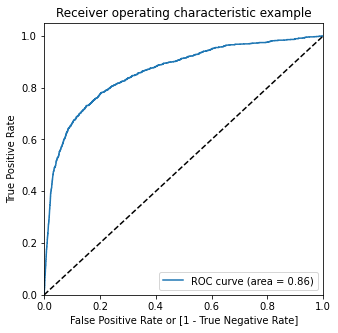

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cut off 

In [161]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.039111          0    1    0    0    0    0    0    0    0    0   
1      0    0.091664          0    1    0    0    0    0    0    0    0    0   
2      0    0.143870          0    1    1    0    0    0    0    0    0    0   
3      0    0.018442          0    1    0    0    0    0    0    0    0    0   
4      0    0.015395          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.069048  1.000000  0.000000
0.1   0.1  0.792168  0.781805  0.792936
0.2   0.2  0.903273  0.605544  0.925356
0.3   0.3  0.935663  0.358920  0.978440
0.4   0.4  0.932718  0.056148  0.997733
0.5   0.5  0.931688  0.016347  0.999578
0.6   0.6  0.931197  0.007107  0.999736
0.7   0.7  0.931099  0.003554  0.999895
0.8   0.8  0.931148  0.003554  0.999947
0.9   0.9  0.931099  0.002132  1.000000


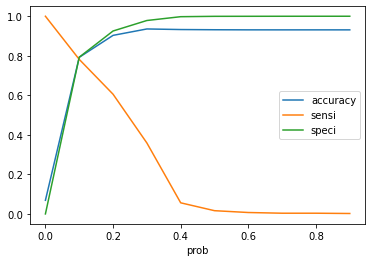

In [163]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Optimal value is 0.1

In [164]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_final.head()

Churn    Churn_Prob  predicted
3535       1  3.486586e-01          1
22086      0  3.417670e-07          0
23438      0  4.816458e-04          0
9813       0  4.364506e-02          0
14182      0  4.671707e-04          0

In [165]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6478 1652]
 [ 126  477]]

Accuracy : 0.7964044429176687


In [166]:
abs(res.params).sort_values(ascending=False)[0:11]

spl_ic_mou_8         3.109231
monthly_2g_8         0.812959
og_others_8          0.683108
const                0.645525
sachet_2g_8          0.517183
total_rech_data_8    0.514982
gd_ph_spl_ic_mou     0.418024
gd_ph_monthly_2g     0.320679
count_rech_2g_8      0.295775
gd_ph_sachet_3g      0.283332
gd_ph_monthly_3g     0.220679
dtype: float64

So using Logistic regression we are geting an accuracy of 79.6% on test data


## MODEL 2- DECISION TREE

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=25)

In [169]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.9600039259949944
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8121
           1       0.38      0.26      0.31       612

    accuracy                           0.92      8733
   macro avg       0.66      0.61      0.63      8733
weighted avg       0.91      0.92      0.91      8733



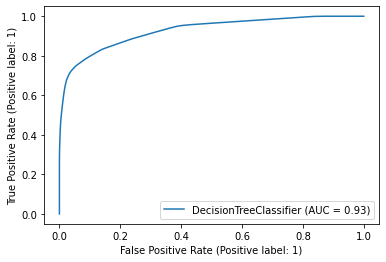

In [183]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(intial_dt, X_train, y_train,)

plt.show()

### Hyperparameter tuning

In [171]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [172]:
grid_search.best_score_

0.9316387055833164

In [173]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [174]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8121
           1       0.52      0.18      0.27       612

    accuracy                           0.93      8733
   macro avg       0.73      0.58      0.62      8733
weighted avg       0.91      0.93      0.92      8733



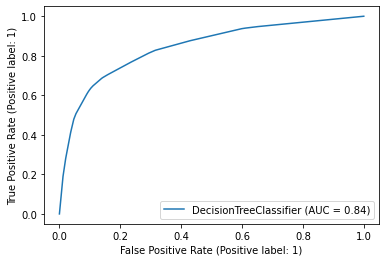

In [184]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(dt_best, X_train, y_train)

plt.show()

an accuracy of 93% on test data, with decission tree

### Model 3. Random Forest

Train accuracy : 0.9600039259949944
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8121
           1       0.60      0.17      0.26       612

    accuracy                           0.93      8733
   macro avg       0.77      0.58      0.61      8733
weighted avg       0.92      0.93      0.92      8733



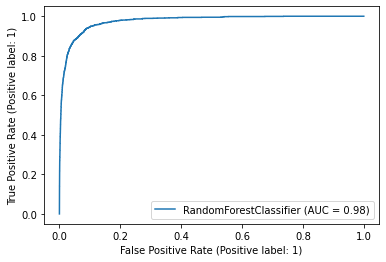

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

Note -Accuracy -93%

### Hyperparameter tuning

In [185]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [186]:
grid_search.best_score_

0.9354664977519782

In [187]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=25)

In [188]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8121
           1       0.60      0.17      0.26       612

    accuracy                           0.93      8733
   macro avg       0.77      0.58      0.61      8733
weighted avg       0.92      0.93      0.92      8733



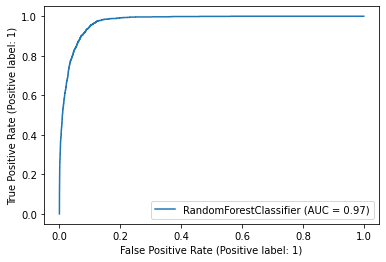

In [189]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

accuracy of 93%

## 4.. Adaboost

In [190]:
from sklearn.ensemble import AdaBoostClassifier

In [191]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9299209893507385

In [192]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

In [194]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8121
           1       0.60      0.17      0.26       612

    accuracy                           0.93      8733
   macro avg       0.77      0.58      0.61      8733
weighted avg       0.92      0.93      0.92      8733



In [195]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [196]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18979
           1       0.89      0.31      0.47      1398

    accuracy                           0.95     20377
   macro avg       0.92      0.66      0.72     20377
weighted avg       0.95      0.95      0.94     20377

Report on test data
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8121
           1       0.60      0.17      0.26       612

    accuracy                           0.93      8733
   macro avg       0.77      0.58      0.61      8733
weighted avg       0.92      0.93      0.92      8733



Recommendation - 

1.Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

2.The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.

3.To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.